# Crisp Metrics 

## Task-1

Supervised Machine Learning - Disease Prediction

Dataset Link: https:// www.kaggle.com/kaushil268/disease

Perform visualization and make use of different machine learning algorithms to predict the type of disease. 

Compare at least 3 different algorithms and show their accuracies with the help of a graph.

In [1]:
import warnings
warnings.simplefilter('ignore')

### Importing required libraries -

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Loading the dataset 

Loading train data -

In [5]:
train = pd.read_csv(r'C:\Users\HP\Desktop\Crisp Metrics\Task-1\train_data.csv')

Loading test data -

In [6]:
test = pd.read_csv(r'C:\Users\Lenovo\HP\Crisp Metrics\Task-1\test_data.csv')

### Performing EDA 

EDA on train data - 

In [7]:
train.sample(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
3961,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Tuberculosis,NaN
936,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Migraine,NaN
3090,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Malaria,NaN
777,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
1214,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,Psoriasis,NaN
4430,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD,NaN
3837,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [8]:
train.shape

(4920, 134)

In [9]:
train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [10]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 134 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   itching                         4920 non-null   int64  
 1   skin_rash                       4920 non-null   int64  
 2   nodal_skin_eruptions            4920 non-null   int64  
 3   continuous_sneezing             4920 non-null   int64  
 4   shivering                       4920 non-null   int64  
 5   chills                          4920 non-null   int64  
 6   joint_pain                      4920 non-null   int64  
 7   stomach_pain                    4920 non-null   int64  
 8   acidity                         4920 non-null   int64  
 9   ulcers_on_tongue                4920 non-null   int64  
 10  muscle_wasting                  4920 non-null   int64  
 11  vomiting                        4920 non-null   int64  
 12  burning_micturition             4

In [11]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.0,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,0.021951,0.389024,0.043902,0.021951,0.392683,0.023171,0.023171,0.023171,0.046341,0.092683,0.046341,0.092683,0.021951,0.023171,0.114634,0.276829,0.021951,0.091463,0.137805,0.021951,0.045122,0.230488,0.185366,0.115854,0.232927,0.234146,0.024390,0.046341,0.04

### Data Pre-Processing -

In [12]:
train.drop('Unnamed: 133', axis=1, inplace=True)

Checking for null values -

In [13]:
train.isnull().sum().any()

False

Checking for duplicate rows - 

In [14]:
duplicate_rows = train[train.duplicated()]
duplicate_rows.shape

(4616, 133)

Removing duplicate rows -

In [15]:
train.drop_duplicates(inplace=True)
train.shape

(304, 133)

Checking the outcome labels -

In [16]:
train['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

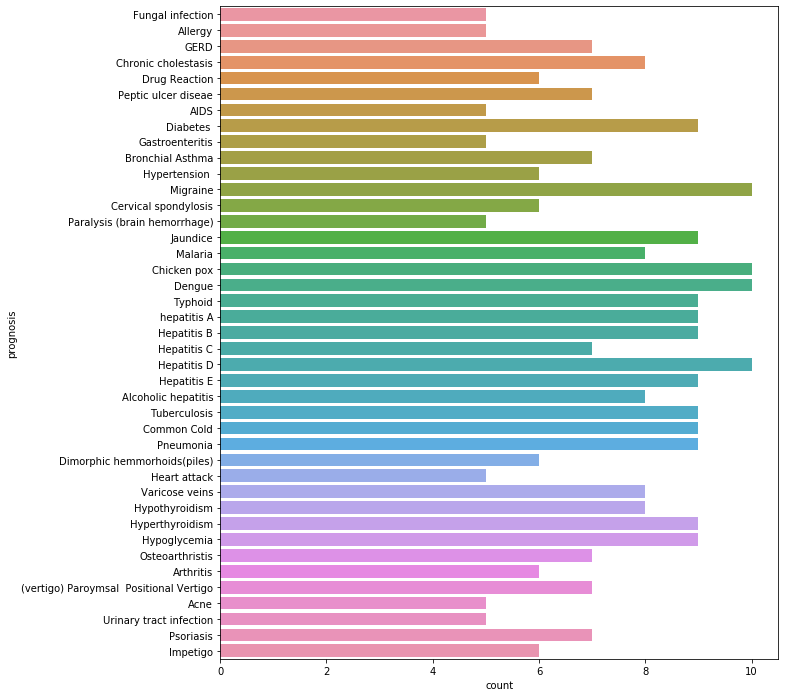

In [17]:
data=train
plt.figure(figsize = (10, 12))
countplot = sns.countplot(y='prognosis', data=data)
plt.show()

EDA on test data -

In [18]:
test.sample(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Tuberculosis
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Gastroenteritis
32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hyperthyroidism
34,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [19]:
test.shape

(42, 133)

Checking for null values -

In [20]:
test.isnull().sum().any()

False

Checking for duplicate rows -

In [21]:
duplicate_rows = test[test.duplicated()]
duplicate_rows.shape

(0, 133)

### Splitting Dependent and Independent variables

Performing split on train data -

In [22]:
X_train = data.drop('prognosis', axis=1)
y_train = data['prognosis']

Performing split on test data - 

In [23]:
X_test = test.drop('prognosis', axis=1)
y_test = test['prognosis']

### Feature Selection

Removing constant features -

In [24]:
from sklearn.feature_selection import VarianceThreshold
const_filter = VarianceThreshold(threshold=0)
const_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [25]:
# Number of features left -
const_filter.get_support().sum()

131

In [26]:
const_list = const_filter.get_support()
X_train.columns[const_list]

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=131)

In [27]:
X_train_filter = const_filter.transform(X_train)
X_test_filter = const_filter.transform(X_test)

In [28]:
X_train_filter.shape

(304, 131)

Removing duplicate features -

In [29]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [30]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [31]:
X_train_T.shape

(131, 304)

In [32]:
X_train_T.duplicated().sum()

11

In [33]:
duplicated_features = X_train_T.duplicated()

In [34]:
non_duplicate_feat = [not feat for feat in duplicated_features]

In [35]:
X_train_unique = X_train_T[non_duplicate_feat].T
X_test_unique = X_test_T[non_duplicate_feat].T

In [36]:
X_train_unique.shape

(304, 120)

Plotting the correlation matrix -

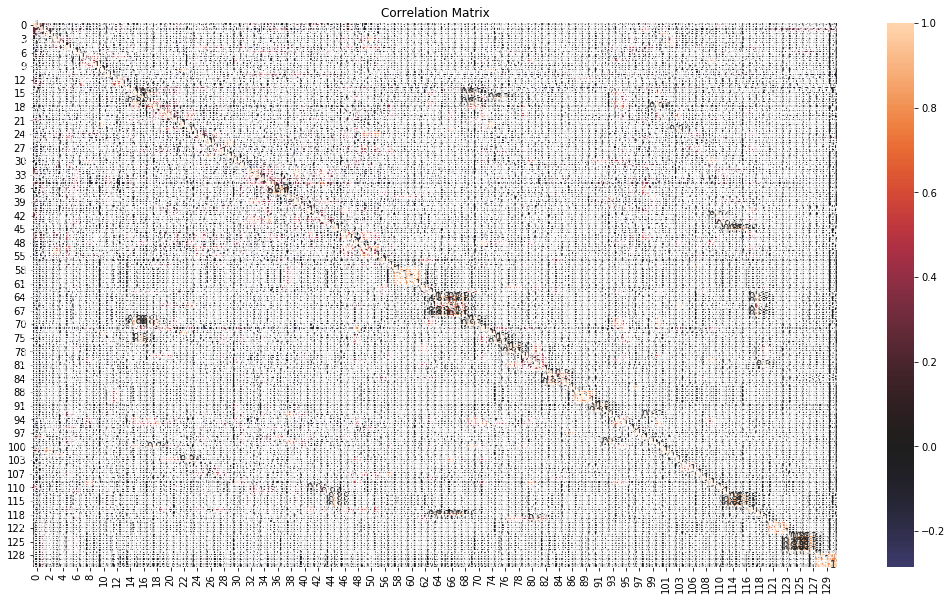

In [37]:
plt.figure(figsize = (18, 10))
cormat = sns.heatmap(X_train_unique.corr(), annot=True, center=0.0)
cormat.set_title('Correlation Matrix')
plt.show()

Removing highly correlated features -

In [38]:
def get_corr(data, threshold):
    corr_col = set() # Set of names of all correlated columns
    cormat = data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i, j])>threshold:
                col_name = cormat.columns[i]
                corr_col.add(col_name)
    return corr_col

In [39]:
corr_features = get_corr(X_train_unique, 0.95)

In [40]:
len(corr_features)

0

In [41]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis=1)
X_test_uncorr = X_test_unique.drop(labels=corr_features, axis=1)

In [42]:
X_train_uncorr.shape

(304, 120)

In [43]:
X_train_final = X_train_uncorr
X_test_final = X_test_uncorr

Importing performance metrics for multi-class classification -

In [44]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, multilabel_confusion_matrix

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1)
lr.fit(X_train_final, y_train)

LogisticRegression(C=0.1)

In [46]:
lr_train = accuracy_score(y_train, lr.predict(X_train_final))
lr_test = accuracy_score(y_test, lr.predict(X_test_final))
print("Train accuracy :{}".format(lr_train))
print("Test accuracy :{}".format(lr_test))

Train accuracy :1.0
Test accuracy :0.9761904761904762


In [47]:
y_pred_lr = lr.predict(X_test_final)

In [48]:
y_pred_proba_lr = lr.predict_proba(X_test_final)

In [49]:
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_proba_lr, multi_class='ovr')))

AUC Score: 1.0


In [50]:
f1_score(y_test, y_pred_lr, average=None)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [51]:
multilabel_confusion_matrix(y_test, y_pred_lr)

array([[[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[40,  0],
        [ 1,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,

## Support Vector Classifier

In [52]:
from sklearn.svm import SVC
svc = SVC(C=10, kernel='poly', degree=3, probability=True)
svc.fit(X_train_final, y_train)

SVC(C=10, kernel='poly', probability=True)

In [53]:
svc_train = accuracy_score(y_train, svc.predict(X_train_final))
svc_test = accuracy_score(y_test, svc.predict(X_test_final))
print("Train accuracy :{}".format(svc_train))
print("Test accuracy :{}".format(svc_test))

Train accuracy :1.0
Test accuracy :1.0


In [54]:
y_pred_svc = svc.predict(X_test_final)

In [55]:
y_pred_proba_svc = svc.predict_proba(X_test_final)

In [56]:
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_proba_svc, multi_class='ovr')))

AUC Score: 1.0


In [57]:
f1_score(y_test, y_pred_svc, average=None)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [58]:
multilabel_confusion_matrix(y_test, y_pred_svc)

array([[[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[40,  0],
        [ 0,  2]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,

## Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3)
dt.fit(X_train_final, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3)

In [60]:
dt_train = accuracy_score(y_train, dt.predict(X_train_final))
dt_test = accuracy_score(y_test, dt.predict(X_test_final))
print("Train accuracy :{}".format(dt_train))
print("Test accuracy :{}".format(dt_test))

Train accuracy :0.9407894736842105
Test accuracy :0.9761904761904762


In [61]:
y_pred_dt = dt.predict(X_test_final)

In [62]:
y_pred_proba_dt = dt.predict_proba(X_test_final)

In [63]:
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_proba_dt, multi_class='ovr')))

AUC Score: 0.9936049970255799


In [64]:
f1_score(y_test, y_pred_dt, average=None)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [65]:
multilabel_confusion_matrix(y_test, y_pred_dt)

array([[[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[40,  1],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[40,  0],
        [ 1,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,

## K-Neighbors Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_final, y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
knn_train = accuracy_score(y_train, knn.predict(X_train_final))
knn_test = accuracy_score(y_test, knn.predict(X_test_final))
print("Train accuracy :{}".format(knn_train))
print("Test accuracy :{}".format(knn_test))

Train accuracy :1.0
Test accuracy :1.0


In [68]:
y_pred_knn = knn.predict(X_test_final)

In [69]:
y_pred_proba_knn = knn.predict_proba(X_test_final)

In [70]:
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')))

AUC Score: 1.0


In [71]:
f1_score(y_test, y_pred_knn, average=None)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [72]:
multilabel_confusion_matrix(y_test, y_pred_knn)

array([[[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[40,  0],
        [ 0,  2]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,

## Naive Bayes Classifier

In [85]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train_final, y_train)

MultinomialNB(alpha=0.1)

In [86]:
nb_train = accuracy_score(y_train, nb.predict(X_train_final))
nb_test = accuracy_score(y_test, nb.predict(X_test_final))
print("Train accuracy :{}".format(nb_train))
print("Test accuracy :{}".format(nb_test))

Train accuracy :1.0
Test accuracy :1.0


In [75]:
y_pred_nb = nb.predict(X_test_final)

In [76]:
y_pred_proba_nb = nb.predict_proba(X_test_final)

In [77]:
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_proba_nb, multi_class='ovr')))

AUC Score: 1.0


In [78]:
f1_score(y_test, y_pred_nb, average=None)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [79]:
multilabel_confusion_matrix(y_test, y_pred_nb)

array([[[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[40,  0],
        [ 0,  2]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  1]],

       [[41,

Comparing the accuracy score of different classifier models -

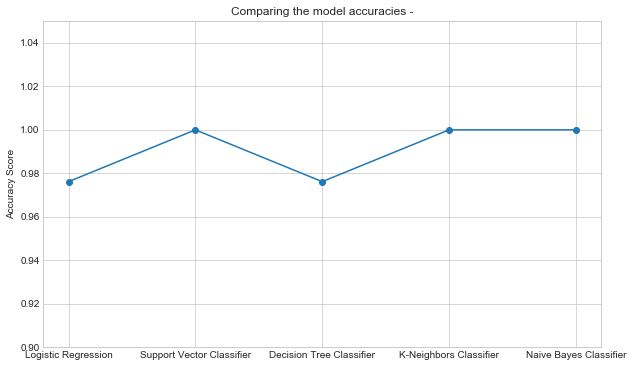

In [80]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 6))
models = ['Logistic Regression', 'Support Vector Classifier', 'Decision Tree Classifier', 
          'K-Neighbors Classifier', 'Naive Bayes Classifier']
test_accuracy = [lr_test, svc_test, dt_test, knn_test, nb_test]
plt.plot(models, test_accuracy, '-o')
plt.title("Comparing the model accuracies -")
plt.ylim(0.90, 1.05)
plt.ylabel("Accuracy Score")
plt.show()

# THANK YOU